<a href="https://colab.research.google.com/github/mariokart345/DS-Unit-2-Kaggle-Challenge/blob/master/module4-classification-metrics/LS_DS_224_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 4*

---

# Classification Metrics

## Assignment
- [ ] If you haven't yet, [review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Plot a confusion matrix for your Tanzania Waterpumps model.
- [ ] Continue to participate in our Kaggle challenge. Every student should have made at least one submission that scores at least 70% accuracy (well above the majority class baseline).
- [ ] Submit your final predictions to our Kaggle competition. Optionally, go to **My Submissions**, and _"you may select up to 1 submission to be used to count towards your final leaderboard score."_
- [ ] Commit your notebook to your fork of the GitHub repo.
- [ ] Read [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](http://archive.is/DelgE), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.


## Stretch Goals

### Reading

- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)


### Doing
- [ ] Share visualizations in our Slack channel!
- [ ] RandomizedSearchCV / GridSearchCV, for model selection. (See module 3 assignment notebook)
- [ ] Stacking Ensemble. (See module 3 assignment notebook)
- [ ] More Categorical Encoding. (See module 2 assignment notebook)

In [ ]:
%%capture
DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

In [ ]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

In [ ]:
import numpy as np
#Dataset Wrangling function
def wrangle(df):
  #Dropping High Correlation columns
  df.drop(labels=['recorded_by','quantity_group','extraction_type_group','extraction_type_class','waterpoint_type_group','source_class','payment_type','management_group','source_type','quality_group','id','scheme_name'],axis=1,inplace=True)
  #Datetime conversion and feature enginering
  df['date_recorded'] = pd.to_datetime(df['date_recorded'],infer_datetime_format=True)
  df['years_since_construction'] = df['date_recorded'].dt.year - df['construction_year']
  df.drop('date_recorded',axis=1,inplace=True)
  #Turning zeros to NaNs
  zero = ['longitude', 'latitude', 'construction_year','gps_height', 'population']
  for col in zero:
    df[col].replace(0, np.nan,inplace=True)
  return df

#Function to make features and target
#Useage: feature,target = feat_target(dataframe)
def feat_target(df):
  y = df['status_group'].values.ravel()
  x = df.drop(labels=['status_group'],axis=1)
  return x,y

In [ ]:
#Applying wrangle funciton
train = wrangle(train)
test = wrangle(test)

In [ ]:
#Spliting training dataset
from sklearn.model_selection import train_test_split
train,val = train_test_split(train,train_size=0.8,test_size=0.2,random_state=25)

In [ ]:
#Applying Feature and Target
X_train,y_train = feat_target(train)
X_val,y_val = feat_target(val)

In [ ]:
#Just for importing all the libraries for below
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
#Further tuning my hyperparameters
pipeline_base = make_pipeline(ce.OrdinalEncoder(),SimpleImputer(),RandomForestClassifier())
param_distributions = {'simpleimputer__strategy':['mean','median'],'randomforestclassifier__max_depth':[24,21,22,23,24],'randomforestclassifier__n_estimators':[415,420,425,430,435,440,445]}
search = GridSearchCV(pipeline_base,param_grid=param_distributions,cv=5,return_train_score=True,verbose=10,n_jobs=-1)
search.fit(X_train,y_train);

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed: 2

In [ ]:
print(search.best_params_)
print(search.best_score_)

{'randomforestclassifier__max_depth': 21, 'randomforestclassifier__n_estimators': 445, 'simpleimputer__strategy': 'mean'}
0.8071338383838385


In [ ]:
#Making and fitting new pipeline with tuned hyperparameters
pipeline = make_pipeline(ce.OrdinalEncoder(),SimpleImputer(strategy='median'),RandomForestClassifier(max_depth=21,n_estimators=450,n_jobs=-1,random_state=25))
pipeline.fit(X_train,y_train)
pipeline.score(X_val,y_val)

0.8128787878787879

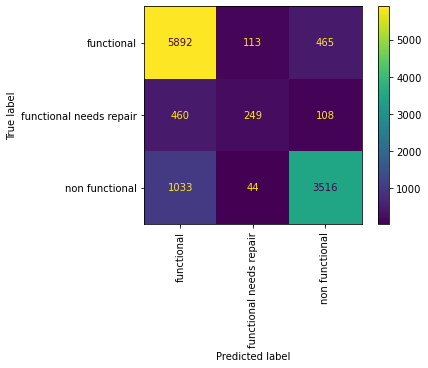

In [ ]:
#Plotting Confusion Matrix
plot_confusion_matrix(pipeline,X_val,y_val,values_format='.0f',xticks_rotation='vertical')

In [ ]:
#Prining Classification Report
y_pred = pipeline.predict(X_val)
print(classification_report(y_val,y_pred))

                         precision    recall  f1-score   support

             functional       0.80      0.91      0.85      6470
functional needs repair       0.61      0.30      0.41       817
         non functional       0.86      0.77      0.81      4593

               accuracy                           0.81     11880
              macro avg       0.76      0.66      0.69     11880
           weighted avg       0.81      0.81      0.80     11880



In [ ]:
pd.to_csv('LS_DS_224_submission')
files = ['LS_DS_221_submission.csv', 'LS_DS_222_submission.csv', 'LS_DS_223_submission.csv']
submissions = (pd.read_csv(file)[['status_group']] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('LS_DS_224_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)